# Lineages of Planaria: subsampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_version_and_date()
sc.logging.print_versions_dependencies_numerics()

Running Scanpy 0.4.2.post2 on 2018-02-06 15:47.
Dependencies: numpy==1.13.3 scipy==1.0.0 pandas==0.21.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


Some plotting parameters.

In [2]:
aga_plot_params = dict(
    legend_fontsize=5,
    root='neoblast 1',
    layout='rt_circular',
    node_size_scale=0.5,
    node_size_power=0.9,
    max_edge_width=0.7,
    fontsize=3.5)

Using the full data as computed in the main notebook.

In [3]:
adata = sc.read('./write/planaria_171202_R.h5ad')

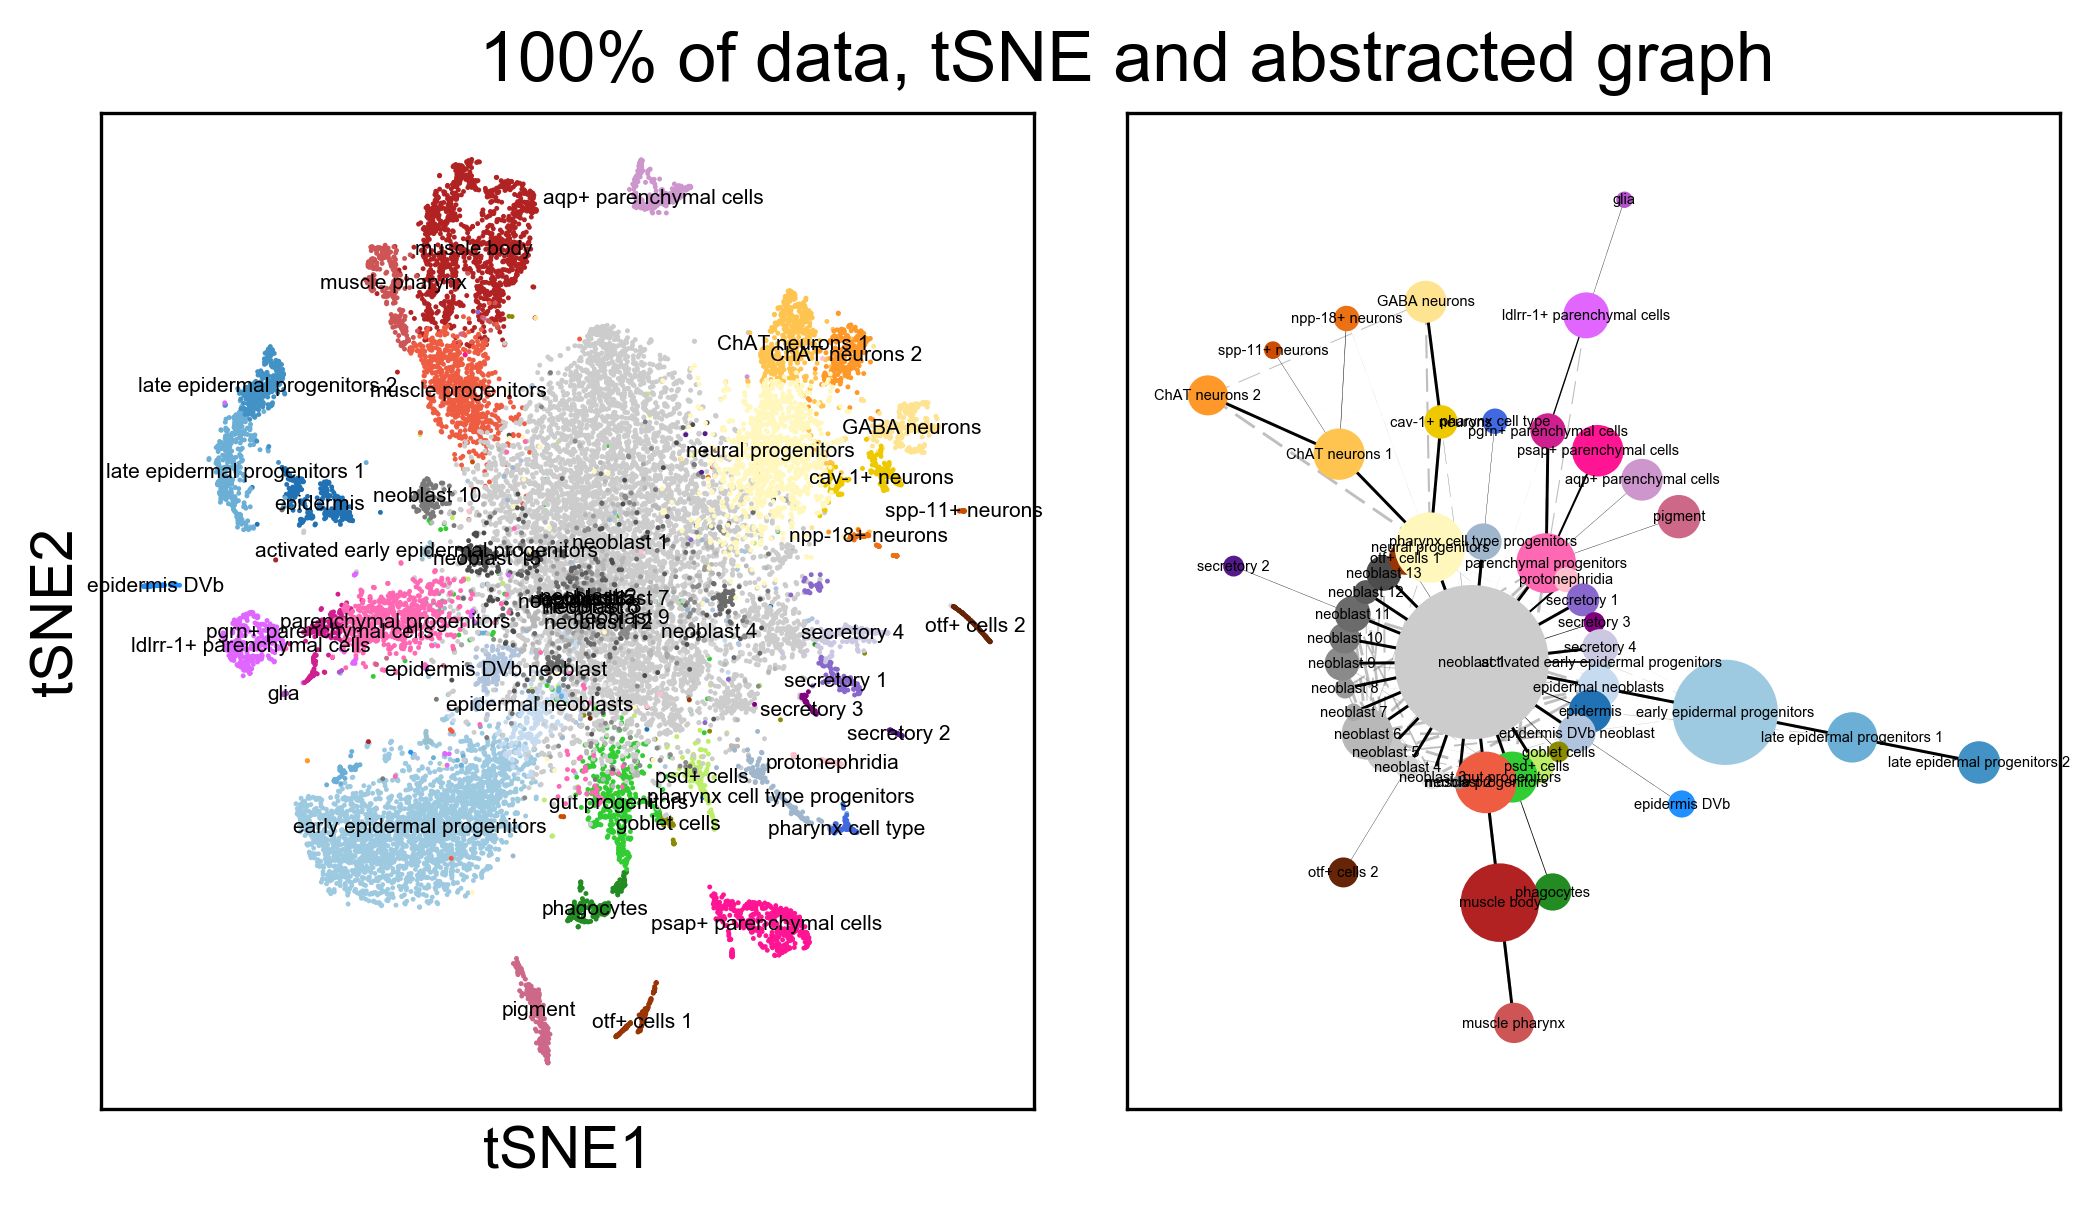

In [4]:
sc.pl.aga(adata, title='100% of data, tSNE and abstracted graph', **aga_plot_params)

Subsampling to 80% of the data, 17289 cells.

In [5]:
adata_subsampled = sc.read('./write/planaria_171202_R.h5ad')
sc.pp.subsample(adata_subsampled, fraction=0.8)
adata_subsampled.n_obs

17289

In [6]:
sc.tl.aga(adata_subsampled, groups='clusters', n_neighbors=30, recompute_graph=True)

running Approximate Graph Abstraction (AGA)
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9954674244  0.9935511351  0.9926248789  0.9923136234
      0.9910349846  0.9902562499  0.9888063669  0.9846724272  0.9842787981
      0.9808446169  0.9789586067  0.9779244661  0.9764704108  0.9743697047]
    abstracted graph will have 51 nodes
    finished (0:00:32.501)


We recover the same graph as with 100% of the data.

saving figure to file ./figures/aga_80percent.png


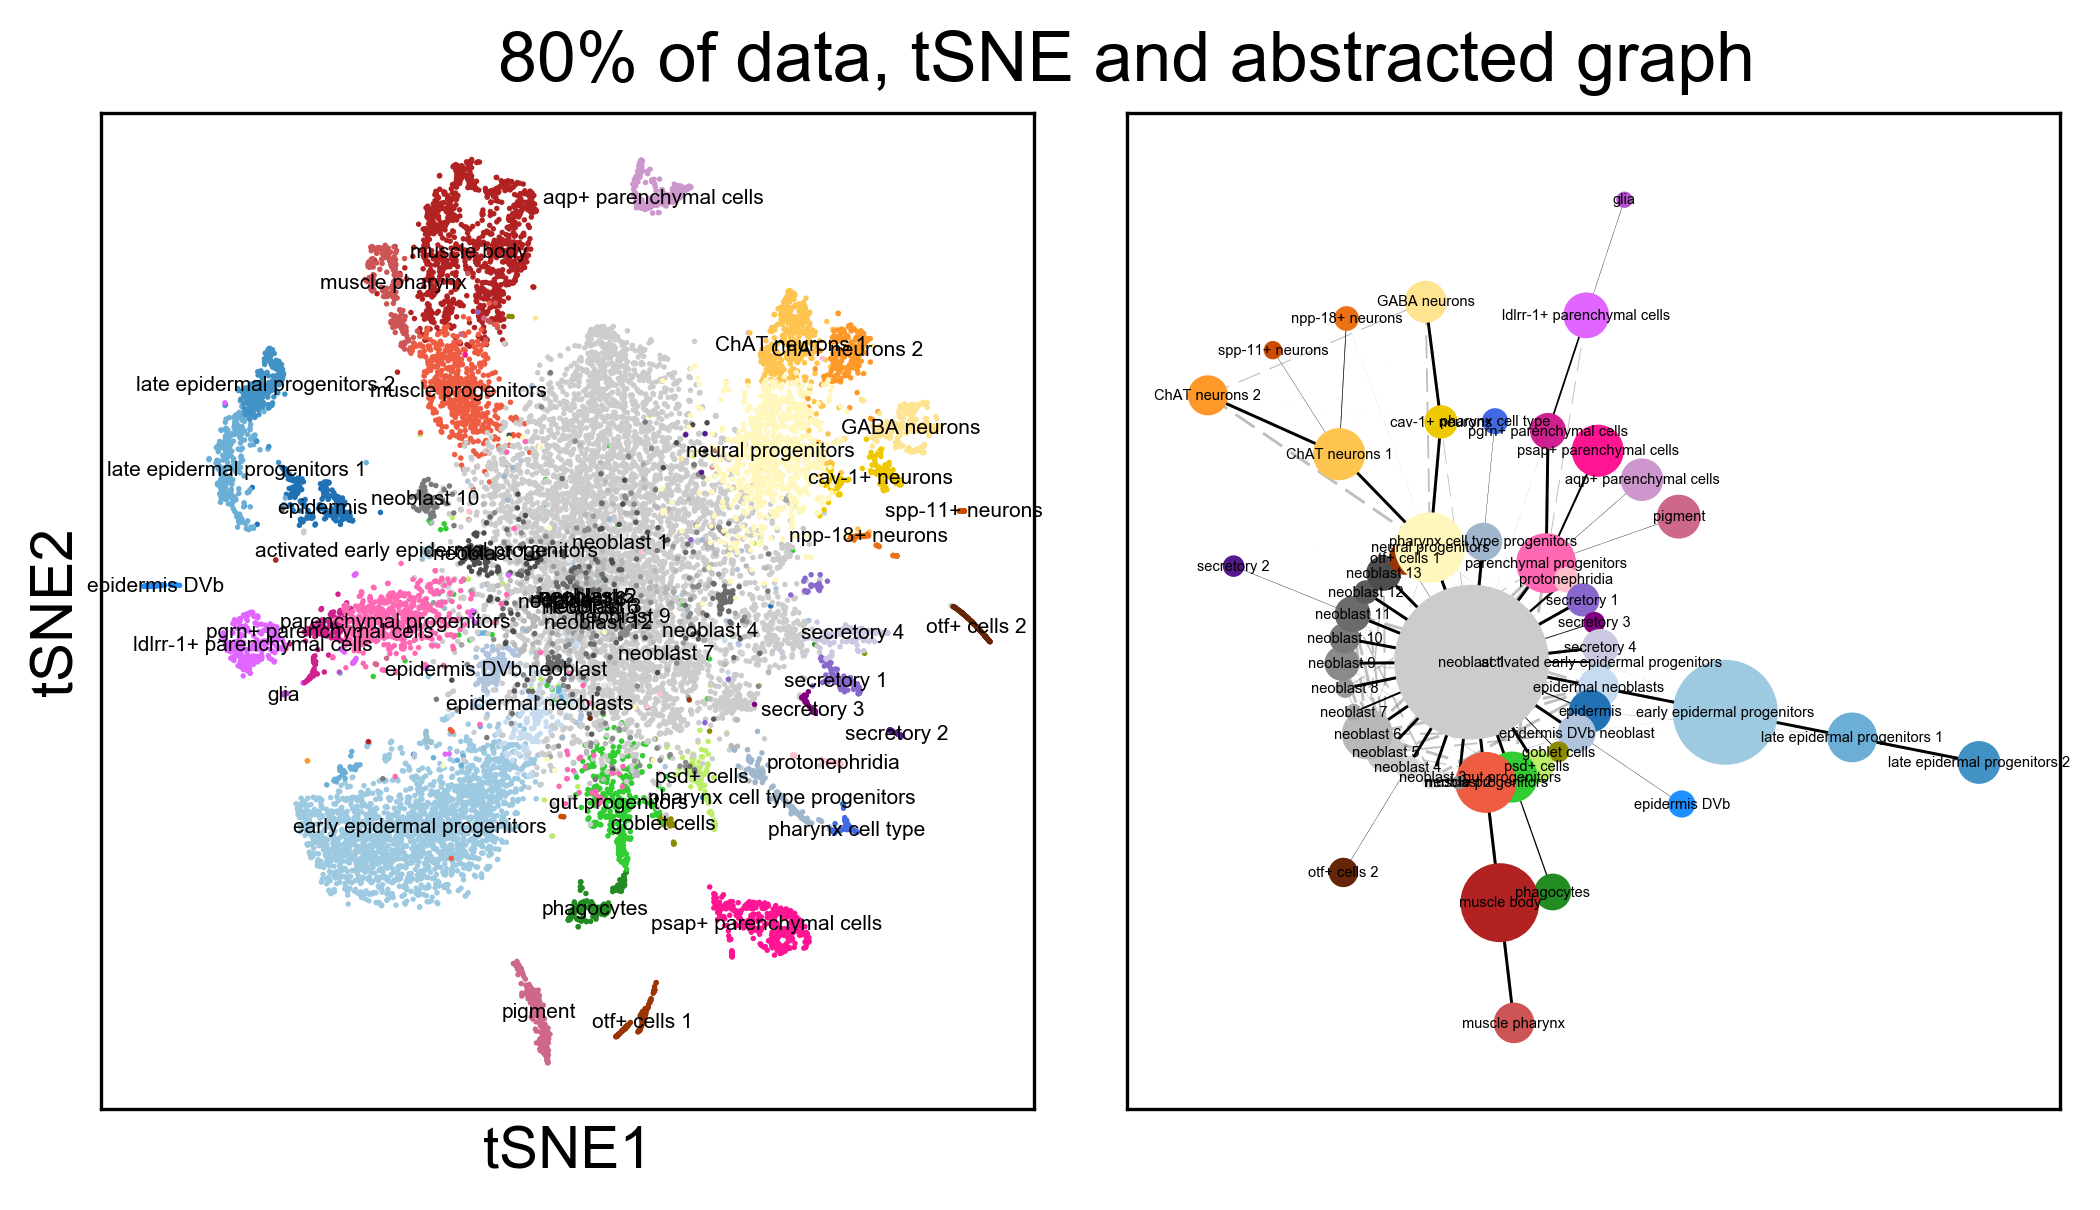

In [7]:
sc.pl.aga(adata_subsampled, title='80% of data, tSNE and abstracted graph', **aga_plot_params, save='_80percent')

Subsampling to 10% of the data, 2161 cells.

In [8]:
adata_subsampled = sc.read('./write/planaria_171202_R.h5ad')
sc.pp.subsample(adata_subsampled, fraction=0.1)
adata_subsampled.n_obs

2161

In [9]:
sc.tl.aga(adata_subsampled, groups='clusters', n_neighbors=30, recompute_graph=True)

running Approximate Graph Abstraction (AGA)
    using data matrix X directly for building graph (no PCA)
    computing data graph with n_neighbors = 30 
    computing spectral decomposition ("diffmap") with 15 components
    eigenvalues of transition matrix
    [ 1.            0.9743947387  0.9721541405  0.9662333727  0.9546898603
      0.9514228702  0.946174562   0.9227160215  0.9067226648  0.8737566471
      0.8732275963  0.8533765674  0.8450675011  0.8341043591  0.8233351111]
    abstracted graph will have 51 nodes
    finished (0:00:02.973)


saving figure to file ./figures/aga_10percent.png


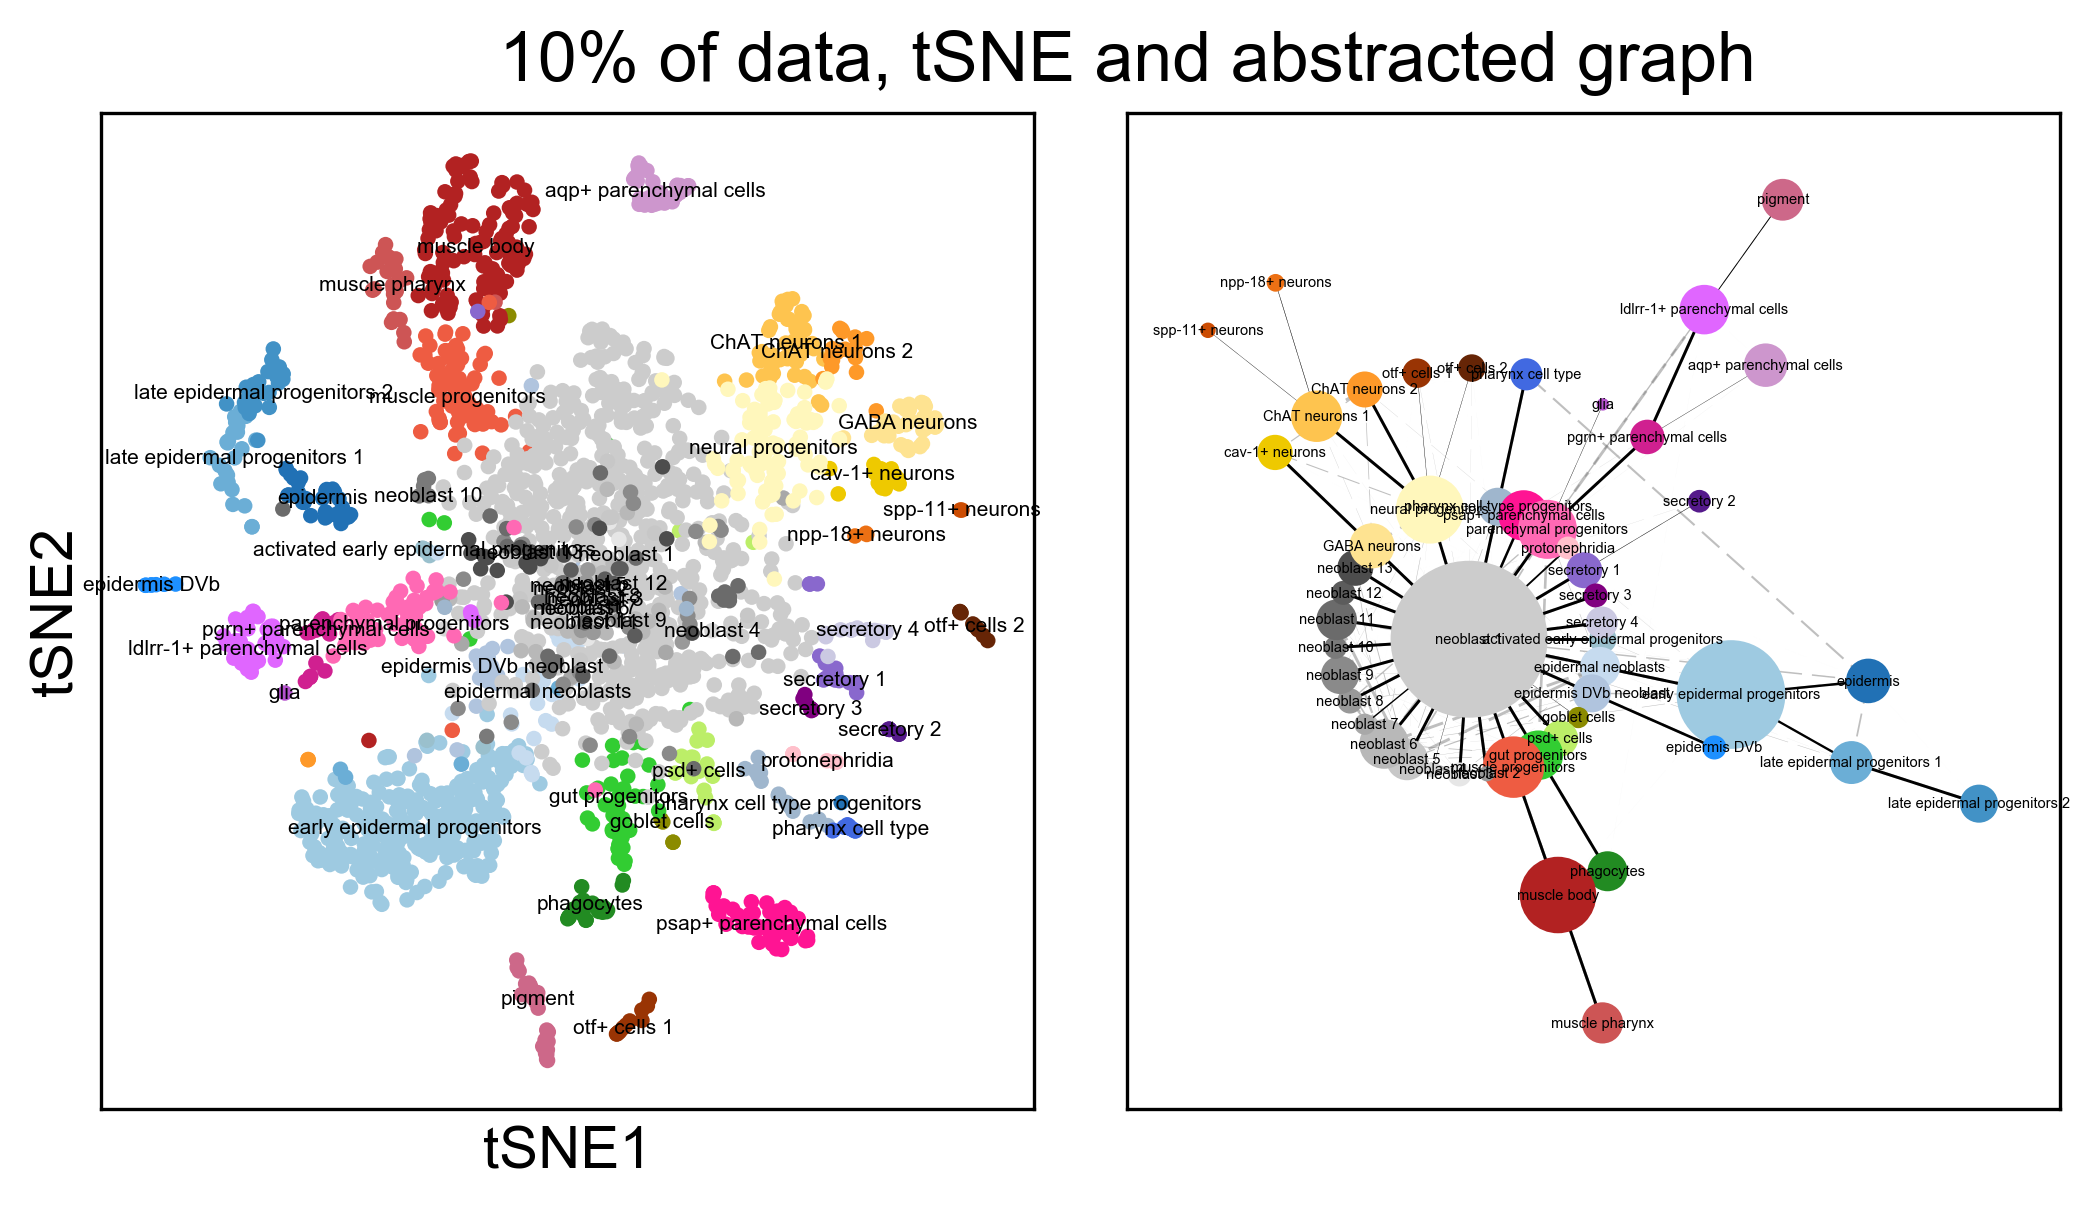

In [10]:
sc.pl.aga(adata_subsampled, title='10% of data, tSNE and abstracted graph', **aga_plot_params, save='_10percent')